In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import date
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import colors

### Create regression data

In [47]:
tfidf_path = '../../data/tfidf_toprev_conlen_full_v2/'

In [48]:
lda_path = '../../data/lda_jsd_toprev_conlen/'

In [49]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [50]:
def first_rel(field):
    try:
        return field.split(',')[0]
    except:
        return field

In [51]:
def find_major_rel(df):
    df['Relationship'] = df.apply(lambda row: first_rel(row['Relationship']), axis=1)
    counts = df['Relationship'].value_counts()
    return counts.keys()[0:5]


In [78]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_toprev_conlen.tsv'), sep = '\t')
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_temporal_lda_jsd_toprev_full.tsv'), sep = '\t')
    del df_lda['index']
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
 'ChapterIndex', 'Chapters' ,'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language', 'Notes' ,'PublishDate' ,'Rating',\
 'Relationship' ,'Summary' ,'Title' ,'URL' ,'UpdateDate' ,'Words'], how='inner')
        
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    df['Kudos'] = df['Kudos']/df['Chapters']
    
    df['Hits'] = df['Hits']/df['Chapters']
    
    df['Bookmarks'] = df['Bookmarks']/df['Chapters']
    
    freq_rel = find_major_rel(df)
    df['Relationship'] = df['Relationship'].apply(lambda x: first_rel(x))
    df['Freq_relationship'] = df['Relationship'].apply(lambda x: 1 if x in freq_rel else 0)
    del df['Relationship']
    df_all.append(df)
    

In [79]:
df_all = pd.concat(df_all)

In [80]:
len(df_all)

609812

In [81]:
len(df_all[df_all.Kudos == 0])

10685

In [82]:
# df_all = df.head(500)

In [83]:
del df_all['Language']
del df_all['Notes']
del df_all['Summary']
del df_all['Title']
del df_all['URL']
del df_all['AdditionalTags']
del df_all['Characters']
del df_all['Words']

In [87]:
df_t = df_all.copy().head(100)

In [90]:
def first_category(field):
    try:
        cat_3 = ['F/F', 'F/M', 'Gen', 'M/M']
        if field[0:3] in cat_3:
            return field[0:3]
        cat_5 = ['Multi', 'Other']
        if field[0:5] in cat_5:
            return field[0:5]
    except:
        return 'None'

In [96]:
df_all['Category'] = df_all.apply(lambda row: first_category(row['Category']), axis=1)

In [15]:
# df_all['ArchiveWarnings_underage'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Underage' in x else 0)
# df_all['ArchiveWarnings_death'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Major Character Death' in x else 0)
# df_all['ArchiveWarnings_choose_no'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Creator Chose Not To Use Archive Warnings' in x else 0)
# df_all['ArchiveWarnings_no_apply'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'No Archive Warnings Apply' in x else 0)
# df_all['ArchiveWarnings_violence'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Graphic Depictions Of Violence' in x else 0)
# df_all['ArchiveWarnings_noncon'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Rape/Non-Con' in x else 0)

del df_all['ArchiveWarnings']

In [97]:
set(df_all['ArchiveWarnings'].tolist())

{'BDSM - Warning',
 'BDSM - Warning, Explicit Sex - Warning',
 'Creator Chose Not To Use Archive Warnings',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, No Archive Warnings Apply',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, No Archive Warnings Apply, Rape/Non-Con',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, No Archive Warnings Apply, Rape/Non-Con, Underage',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, Rape/Non-Con',
 'Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, Rape/Non-Con, Underage',
 'Creator Chose Not To Use Archive Warnings, Graphi

In [ ]:
def first_warning(field):
    warnings = ['Creator Chose Not To Use Archive Warnings', ]

In [16]:
# df_all = df_all[df_all['ArchiveWarnings_blood'] != 1]
# df_all = df_all[df_all['ArchiveWarnings_none'] != 1]

In [17]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [18]:
df_all['Author'].fillna('Unknown', inplace=True)
counts = df_all['Author'].value_counts()
idx = counts[counts >= 10].index
df_all['author_fic_cnt'] = df_all['Author'].apply(lambda x: counts[x])
del df_all['Author']

In [19]:
set(df['Rating'].tolist())

{'Explicit',
 'General Audiences',
 'Mature',
 'Not Rated',
 'Teen And Up Audiences'}

In [20]:
# df_all['Rating_E'] = df_all['Rating'].apply(lambda x: 1 if x == 'Explicit' else 0)
# df_all['Rating_G'] = df_all['Rating'].apply(lambda x: 1 if x == 'General Audiences' else 0)
# df_all['Rating_M'] = df_all['Rating'].apply(lambda x: 1 if x == 'Mature' else 0)
# df_all['Rating_N'] = df_all['Rating'].apply(lambda x: 1 if x == 'Not Rated' else 0)
# df_all['Rating_T'] = df_all['Rating'].apply(lambda x: 1 if x == 'Teen And Up Audiences' else 0)
del df_all['Rating']

In [21]:
# df_all['Fandom_harry_potter'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'harry_potter' else 0)
# df_all['Fandom_dcu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dcu' else 0)
# df_all['Fandom_doctor_who'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'doctor_who_&_related_fandoms' else 0)
# df_all['Fandom_star_wars'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'star_wars_all_media_types' else 0)
# df_all['Fandom_arthurian'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'arthurian_mythology_&_related_fandoms' else 0)
# df_all['Fandom_supernatural'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'supernatural' else 0)
# df_all['Fandom_haikyuu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'haikyuu' else 0)
# df_all['Fandom_kuroko_no_basuke'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'kuroko_no_basuke' else 0)
# df_all['Fandom_hamilton_miranda'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hamilton_miranda' else 0)
# df_all['Fandom_dragon_age'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dragon_age_all_media_types' else 0)
# df_all['Fandom_the_walking_dead'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'the_walking_dead_&_related_fandoms' else 0)
# df_all['Fandom_buffy'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'buffy_the_vampire_slayer' else 0)
# df_all['Fandom_les_miserables'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'les_miserables_all_media_types' else 0)
# df_all['Fandom_naruto'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'naruto' else 0)
# df_all['Fandom_tolkien'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'tolkien_j_r_r_works_&_related_fandoms' else 0)
# df_all['Fandom_shakespare'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'shakespare_william_works' else 0)
# df_all['Fandom_hetalia'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hetalia_axis_powers' else 0)
# df_all['Fandom_attack_on_titan'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'attack_on_titan' else 0)
# df_all['Fandom_ms_paint_adventures'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'ms_paint_adventures' else 0)
# df_all['Fandom_marvel'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'marvel' else 0)
# df_all['Fandom_sailor_moon'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'bishoujo_senshi_sailor_moon' else 0)
# df_all['Fandom_one_direction'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'one_direction' else 0)
# df_all['Fandom_sherlock'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'sherlock_holmes_&_related_fandoms' else 0)

# del df_all['fandom_category']

In [22]:
# set(df['Fandoms'].tolist())

In [23]:
df.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Summary', 'Title', 'URL', 'UpdateDate',
       'Words', 'Cos', 'JSD', 'Freq_relationship'], dtype=object)

In [24]:
def date_today(cell):
    try:
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days
    except:
        return float('nan')

In [25]:
df_all['PublishDate'] = df_all.apply(lambda row: date_today(row['PublishDate']), axis = 1)
df_all['CompleteDate'] = df_all.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
df_all['UpdateDate'] = df_all.apply(lambda row: date_today(row['UpdateDate']), axis = 1)

In [26]:
def find_history(field_list):
    field_list = [10000000 if np.isnan(x) else x for x in field_list]
    return np.amin(field_list)

In [27]:
df_all['history'] = df_all.apply(lambda row: find_history([row['PublishDate'], row['CompleteDate'], row['UpdateDate']]), axis=1)

In [28]:
del df_all['PublishDate']
del df_all['CompleteDate']
del df_all['UpdateDate']

In [29]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)

In [30]:
df_all = df_all.dropna()

In [31]:
len(df_all)

609752

In [32]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Fandoms',
       'Hits', 'Kudos', 'Cos', 'JSD', 'Freq_relationship',
       'author_fic_cnt', 'history'], dtype=object)

In [33]:
df_all = df_all.rename(columns = {'history':'History', 'Cos': 'Term_novelty', 'JSD': 'Topic_novelty'})

In [34]:
df_all.head()

,Bookmarks,ChapterIndex,Chapters,Comments,Fandoms,Hits,Kudos,Term_novelty,Topic_novelty,Freq_relationship,author_fic_cnt,History
0,3.000000,0.0,1,5,['Harry Potter - J. K. Rowling'],939.000000,49.000000,0.887581,0.577307,0,10,5815.0
1,0.176471,13.0,17,0,['Harry Potter - J. K. Rowling'],122.705882,1.294118,0.342318,0.657559,0,12,4367.0
2,1.000000,0.0,1,0,['Harry Potter - J. K. Rowling'],626.000000,10.000000,0.854178,0.581707,0,3,5809.0
3,2.000000,0.0,1,1,['Harry Potter - J. K. Rowling'],207.000000,6.000000,0.807707,0.675777,0,3,5813.0
4,0.000000,0.0,1,0,['Harry Potter - J. K. Rowling'],70.000000,3.000000,0.790260,0.679626,0,6,5814.0


In [35]:
df_all.to_csv('fanfic_regression_data_curated_rgam.tsv', sep = '\t', index=False)

### Correlations

In [36]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [37]:
df_all = df_all.rename(columns = {'History': 'Age', 'author_fic_cnt':'Author fiction count',\
                                  'Term_novelty': 'Term novelty', 'Topic_novelty':'Topic novelty'})

In [38]:
term_ave = np.average(df_all['Term novelty'])
topic_ave = np.average(df_all['Topic novelty'])
df_all['Term novelty'] = df_all['Term novelty'] - term_ave
df_all['Topic novelty'] = df_all['Topic novelty'] - topic_ave
df_all['Term novelty squared'] = np.square(df_all['Term novelty'])
df_all['Topic novelty squared'] = np.square(df_all['Topic novelty'])

In [39]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term novelty', 'Topic novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'Author fiction count', 'Rating_E', 'Rating_G', 'Rating_M',
       'Rating_N', 'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_pai

In [40]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Author fiction count', 'Term novelty', 'Topic novelty', 'Term novelty squared', 'Topic novelty squared','Age']].corr()

In [41]:
corr = df_all[['Chapters',
       'Term novelty', 'Topic novelty', 'Freq_relationship',
       'Category_F_M', 'Category_Gen', 'Category_M_M', 'Category_Multi',
       'Category_Other', 'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Author fiction count', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'Age']].corr()

In [42]:
w,v = np.linalg.eig(corr)  

In [43]:
for idx, item in enumerate(corr.columns.values):
    print(item, np.sqrt(max(w)/w[idx]))


Chapters 1.0
Term novelty 1.1155342004857334
Topic novelty 4.251383558825432
Freq_relationship 622.8343939266831
Category_F_M 1.1992135210580541
Category_Gen 643910.373598936
Category_M_M 2.7002484311731303
Category_Multi 1.2758673541393966
Category_Other 2.1197017475512516
Category_Unknown 1.314146925423265
ArchiveWarnings_underage 2.0156127759533087
ArchiveWarnings_death 1.9554163939738423
ArchiveWarnings_choose_no 1.8543953031103237
ArchiveWarnings_no_apply 1.8199629018384875
ArchiveWarnings_violence 1.3870344792432585
ArchiveWarnings_noncon 1.3988352893218672
Author fiction count 1.4217641173114504
Rating_E 1.4288664144349965
Rating_G 1.4446492013262728
Rating_M 1.738007410363896
Rating_N 1.7053058684964189
Rating_T 1.707060208447938
Fandom_harry_potter 1.6707790903712092
Fandom_dcu 1.4790854375685358
Fandom_doctor_who 1.6433433247754192
Fandom_star_wars 1.4907535140761412
Fandom_arthurian 1.5001962557577524
Fandom_supernatural 1.627470782158798
Fandom_haikyuu 1.6133550521482223
Fa

In [44]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


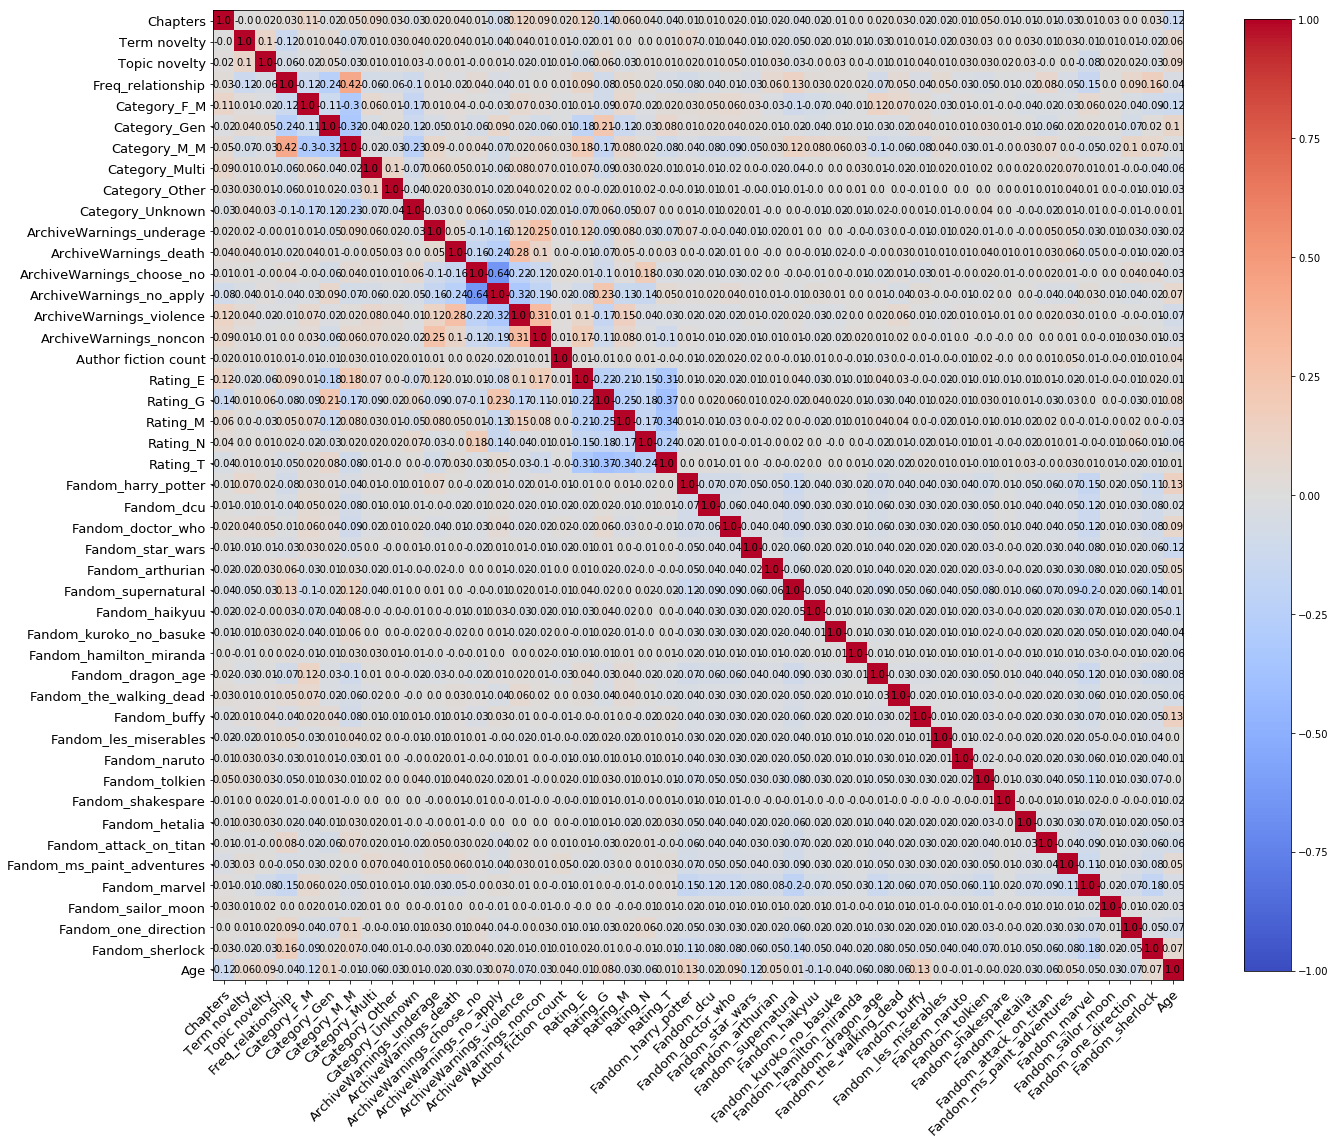

In [45]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (20,20))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='13')

plt.setp(ax.get_yticklabels(), fontsize='13')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.as_matrix()[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
# plt.savefig('variables_corr.pdf', format='pdf')